In [40]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape

import numpy as np
import matplotlib.pyplot as plt

In [41]:
(x_train,_),(x_test,_)= mnist.load_data()

In [42]:
x_train = x_train.astype('float32')
x_train = x_train / 255.0
x_trian = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test =(x_test.astype('float32')/255).reshape(x_test.shape[0], 28, 28, 1)

In [6]:
print(x_train.dtype, x_test.dtype)

float32 float32


In [46]:
# 생성자 모델 생성
autoencoder = Sequential()

# 인코딩 부분 설계  -> (conv, maxpooling) 2번, conv -> 7 * 7 * 8
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu')) # 4 * 4 * 8

# 디코딩 부분 설계 -> 28 * 28 * 1
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())   # 8 * 8 * 8
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())  # 16 * 16 * 8
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))  # 14 * 14 * 8
autoencoder.add(UpSampling2D())  # 28 * 28 * 16
autoencoder.add(Conv2D(1, kernel_size=3, activation='sigmoid', padding='same'))

autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 conv2d_10 (Conv2D)          (None, 4, 4, 8)          

In [47]:
# 컴파일 및 실행
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
autoencoder.fit(x_train, x_train, epochs=30, batch_size=128, validation_data=(x_test, x_test))

Epoch 1/30
469/469 [==============================] - 35s 71ms/step - loss: 0.2120 - val_loss: 0.1433
Epoch 2/30
469/469 [==============================] - 37s 79ms/step - loss: 0.1324 - val_loss: 0.1230
Epoch 3/30
469/469 [==============================] - 37s 79ms/step - loss: 0.1193 - val_loss: 0.1144
Epoch 4/30
469/469 [==============================] - 36s 77ms/step - loss: 0.1125 - val_loss: 0.1089
Epoch 5/30
469/469 [==============================] - 36s 78ms/step - loss: 0.1076 - val_loss: 0.1048
Epoch 6/30
469/469 [==============================] - 36s 78ms/step - loss: 0.1039 - val_loss: 0.1011
Epoch 7/30
469/469 [==============================] - 36s 76ms/step - loss: 0.1010 - val_loss: 0.0989
Epoch 8/30
469/469 [==============================] - 36s 76ms/step - loss: 0.0990 - val_loss: 0.0970
Epoch 9/30
469/469 [==============================] - 36s 77ms/step - loss: 0.0973 - val_loss: 0.0954
Epoch 10/30
469/469 [==============================] - 37s 78ms/step - loss: 0.095

KeyboardInterrupt: 

In [23]:
# 학습된 결과 출력
random_test = np.random.randint(x_test.shape[0], size=5)  # 테스트 idx를 임의로 5개 선정
ae_imgs = autoencoder.predict(x_test) # 오토인코더로 기존의 이미지의 특성을 살려 새로운 이미지 생성

313/313 [==============================] - 3s 11ms/step


In [ ]:
plt.figure(figsize=(7,2))
for i, image_idx in enumerate(random_test):
    ax = plt.subplot(2, 7, i+1)
    plt.imshow(x_test[image_idx].reshape(28,28))
    ax.axis('off')
    
    ax=plt.subplot(2, 7, 7+i+1)
    plt.imshow(ae_imgs[image_idx].reshape(28,28))
    ax.axis('off')
plt.show()

In [43]:
x_test[0].shape

(28, 28, 1)

In [44]:
img = autoencoder.predict([x_test[0]])

1/1 [==============================] - 0s 24ms/step


In [45]:
img.reshape

(28, 28, 4, 1)

TypeError: Invalid shape (28, 28, 4, 1) for image data

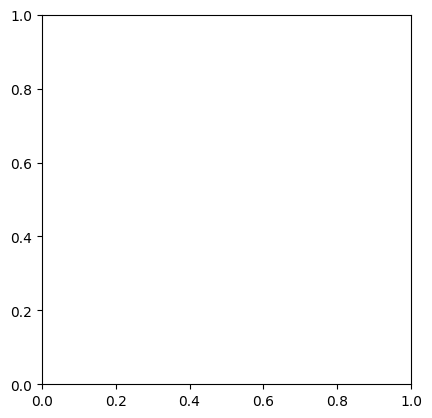

In [39]:
plt.imshow(img.reshape(28,28,4,1))
plt.show()